In [ ]:
# Import necessary libraries
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import torch
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('labeled_data_reduced.csv')

# Preview dataset
print(df.head())

# Assuming the dataset has a 'tweet' column for text and 'class' column for labels
df = df[['tweet', 'class']]

# Map the labels to binary format (0 for non-hate speech, 1 for hate speech)
# Assuming 'class' 0 and 1 are non-hate, and 'class' 2 is hate speech
df['class'] = df['class'].map(lambda x: 1 if x == 2 else 0)

# Preprocessing: Train-test split
train_texts, test_texts, train_labels, test_labels = train_test_split(df['tweet'], df['class'], test_size=0.2, random_state=42)

# Load pre-trained tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Tokenization and encoding
def tokenize_function(texts):
    return tokenizer(texts, padding=True, truncation=True, max_length=512, return_tensors='pt')

train_encodings = tokenize_function(train_texts.tolist())
test_encodings = tokenize_function(test_texts.tolist())

# Convert to torch Dataset
class HateSpeechDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = HateSpeechDataset(train_encodings, train_labels.tolist())
test_dataset = HateSpeechDataset(test_encodings, test_labels.tolist())

# Define metrics for evaluation
def compute_metrics(p):
    preds = p.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(p.label_ids, preds, average='binary')
    acc = accuracy_score(p.label_ids, preds)
    return {'accuracy': acc, 'f1': f1, 'precision': precision, 'recall': recall}

# Training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_dir='./logs',
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

# Train the model
trainer.train()

# Evaluate the model
results = trainer.evaluate()
print(results)

# Make predictions on the test dataset
preds_output = trainer.predict(test_dataset)

# Extract the predictions
preds = preds_output.predictions.argmax(-1)

# Generate confusion matrix
conf_matrix = confusion_matrix(test_labels, preds)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-hate speech', 'Hate speech'], yticklabels=['Non-hate speech', 'Hate speech'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification

# Load pre-trained tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Function to classify input text
def classify_text(text):
    inputs = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors='pt')
    outputs = model(**inputs)
    probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
    return "Hate Speech" if probs.argmax() == 1 else "Not Hate Speech"

# Command-line interface
text = input("Enter the tweet you want to classify: ")
classification = classify_text(text)
print(f'Text: "{text}" is classified as: {classification}')


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Enter the tweet you want to classify: Enjoying the little things in life.
Text: "Enjoying the little things in life." is classified as: Not Hate Speech


In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification

# Load pre-trained tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Function to classify input text
def classify_text(text):
    inputs = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors='pt')
    outputs = model(**inputs)
    probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
    return "Hate Speech" if probs.argmax() == 1 else "Not Hate Speech"

# Command-line interface
text = input("Enter the tweet you want to classify: ")
classification = classify_text(text)
print(f'Text: "{text}" is classified as: {classification}')


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Text: "you're a idiot" is classified as: Hate Speech


In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification

# Load pre-trained tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Function to classify input text
def classify_text(text):
    inputs = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors='pt')
    outputs = model(**inputs)
    probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
    return "Hate Speech" if probs.argmax() == 1 else "Not Hate Speech"

# Command-line interface
text = input("Enter the tweet you want to classify: ")
classification = classify_text(text)
print(f'Text: "{text}" is classified as: {classification}')


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Enter the tweet you want to classify: you're so good
Text: "you're so good" is classified as: Not Hate Speech


In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification

# Load pre-trained tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Function to classify input text
def classify_text(text):
    inputs = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors='pt')
    outputs = model(**inputs)
    probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
    return "Hate Speech" if probs.argmax() == 1 else "Not Hate Speech"

# Command-line interface
text = input("Enter the tweet you want to classify: ")
classification = classify_text(text)
print(f'Text: "{text}" is classified as: {classification}')


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification

# Load pre-trained tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Function to classify input text
def classify_text(text):
    inputs = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors='pt')
    outputs = model(**inputs)
    probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
    return "Hate Speech" if probs.argmax() == 1 else "Not Hate Speech"

# Command-line interface
text = input("Enter the tweet you want to classify: ")
classification = classify_text(text)
print(f'Text: "{text}" is classified as: {classification}')


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Enter the tweet you want to classify: you're a bitch
Text: "you're a bitch" is classified as: Hate Speech


In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification

# Load pre-trained tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Function to classify input text
def classify_text(text):
    inputs = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors='pt')
    outputs = model(**inputs)
    probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
    return "Hate Speech" if probs.argmax() == 1 else "Not Hate Speech"

# Command-line interface
text = input("Enter the tweet you want to classify: ")
classification = classify_text(text)
print(f'Text: "{text}" is classified as: {classification}')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Enter the tweet you want to classify: you're very bad
Text: "you're very bad" is classified as: Hate Speech


   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0        2326      3            0                   3        0      1   
1       16283      3            0                   3        0      1   
2       19362      3            0                   1        2      2   
3       16780      3            0                   3        0      1   
4       13654      3            1                   2        0      1   

                                               tweet  
0        934 8616\ni got a missed call from yo bitch  
1  RT @KINGTUNCHI_: Fucking with a bad bitch you ...  
2  RT @eanahS__: @1inkkofrosess lol my credit ain...  
3  RT @Maxin_Betha Wipe the cum out of them faggo...  
4  Niggas cheat on they bitch and don't expect no...  


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.223900,0.201756,0.941000,0.826979,0.815029,0.839286
2,0.134000,0.183108,0.953000,0.855385,0.885350,0.827381
3,0.052200,0.238380,0.952000,0.852761,0.879747,0.827381


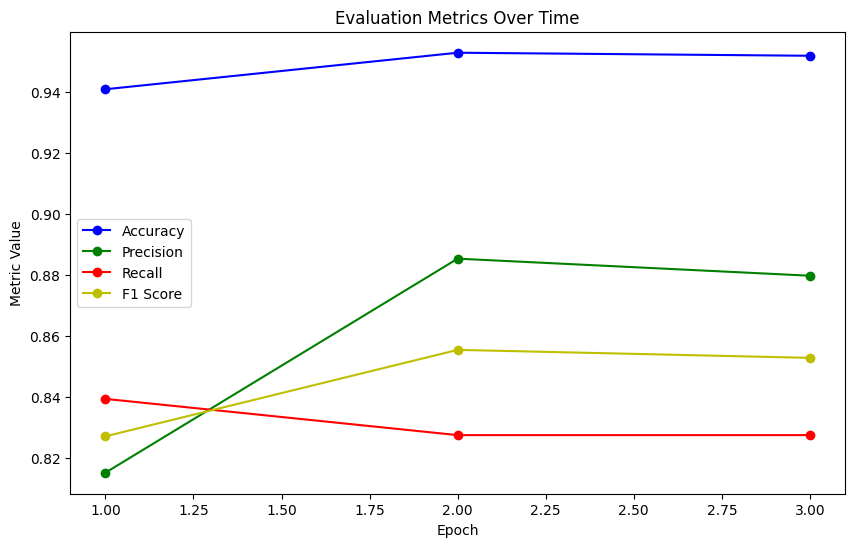

In [ ]:
# Import necessary libraries
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import torch
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('labeled_data_reduced.csv')

# Preview dataset
print(df.head())

# Assuming the dataset has a 'tweet' column for text and 'class' column for labels
df = df[['tweet', 'class']]

# Map the labels to binary format (0 for non-hate speech, 1 for hate speech)
# Assuming 'class' 0 and 1 are non-hate, and 'class' 2 is hate speech
df['class'] = df['class'].map(lambda x: 1 if x == 2 else 0)

# Preprocessing: Train-test split
train_texts, test_texts, train_labels, test_labels = train_test_split(df['tweet'], df['class'], test_size=0.2, random_state=42)

# Load pre-trained tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Tokenization and encoding
def tokenize_function(texts):
    return tokenizer(texts, padding=True, truncation=True, max_length=512, return_tensors='pt')

train_encodings = tokenize_function(train_texts.tolist())
test_encodings = tokenize_function(test_texts.tolist())

# Convert to torch Dataset
class HateSpeechDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = HateSpeechDataset(train_encodings, train_labels.tolist())
test_dataset = HateSpeechDataset(test_encodings, test_labels.tolist())

# Define metrics for evaluation
def compute_metrics(p):
    preds = p.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(p.label_ids, preds, average='binary')
    acc = accuracy_score(p.label_ids, preds)
    return {'accuracy': acc, 'f1': f1, 'precision': precision, 'recall': recall}

# Training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_dir='./logs',
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

# Train the model
trainer.train()

# Extract evaluation metrics safely from the trainer's log history
eval_metrics = [entry for entry in trainer.state.log_history if 'eval_accuracy' in entry]

# Safely extract each metric
epochs = [entry['epoch'] for entry in eval_metrics]
accuracy = [entry['eval_accuracy'] for entry in eval_metrics]
precision = [entry['eval_precision'] for entry in eval_metrics]
recall = [entry['eval_recall'] for entry in eval_metrics]
f1_score = [entry['eval_f1'] for entry in eval_metrics]

# Plot evaluation metrics
plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracy, 'b-o', label='Accuracy')
plt.plot(epochs, precision, 'g-o', label='Precision')
plt.plot(epochs, recall, 'r-o', label='Recall')
plt.plot(epochs, f1_score, 'y-o', label='F1 Score')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.title('Evaluation Metrics Over Time')
plt.legend()
plt.show()
